In [33]:
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import pydataset
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [5]:
swiss = pydataset.data('swiss')

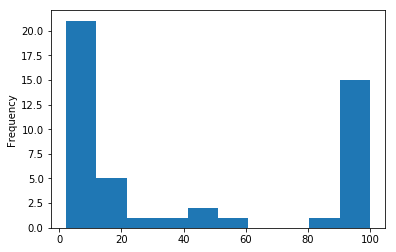

In [6]:
swiss.Catholic.plot.hist()

In [8]:
swiss['is_catholic'] = swiss.Catholic.apply(lambda c: 'Catholic' if c > 70 else 'Not Catholic')

In [13]:
swiss.drop('Catholic', axis=1, inplace=True)

In [60]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,22.2,Not Catholic
Delemont,83.1,45.1,6,9,22.2,Catholic
Franches-Mnt,92.5,39.7,5,5,20.2,Catholic
Moutier,85.8,36.5,12,7,20.3,Not Catholic
Neuveville,76.9,43.5,17,15,20.6,Not Catholic


In [70]:
X = swiss.drop('is_catholic', axis=1)
y = swiss.is_catholic

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=666, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35, 5), (12, 5), (35,), (12,))

In [71]:
y_train.value_counts()

Not Catholic    23
Catholic        12
Name: is_catholic, dtype: int64

In [72]:
y_test.value_counts()

Not Catholic    8
Catholic        4
Name: is_catholic, dtype: int64

In [28]:
results = pd.DataFrame(dict(actual=y_train))

## Logistic Regression

In [59]:
training_dataset = X_train[['Agriculture', 'Examination']]

logit = LogisticRegression().fit(training_dataset, y_train)

results['logistic_regression'] = logit.predict(training_dataset)

print('coefficients', dict(zip(training_dataset.columns, logit.coef_[0])), '\n')

print('accuracy %.2f' % accuracy_score(results.actual, results.logistic_regression))

print(classification_report(results.actual, results.logistic_regression))

coefficients {'Agriculture': -0.0542428057647482, 'Examination': 0.2976948854599162} 

accuracy 0.86
              precision    recall  f1-score   support

    Catholic       0.89      0.67      0.76        12
Not Catholic       0.85      0.96      0.90        23

   micro avg       0.86      0.86      0.86        35
   macro avg       0.87      0.81      0.83        35
weighted avg       0.86      0.86      0.85        35



## Decision Tree

In [64]:
training_dataset = X_train[['Education', 'Fertility']]

dtree = DecisionTreeClassifier(max_depth=2).fit(training_dataset, y_train)

results['decision_tree'] = dtree.predict(training_dataset)

print(accuracy_score(results.actual, results.decision_tree))
print(classification_report(results.actual, results.decision_tree))

0.9142857142857143
              precision    recall  f1-score   support

    Catholic       1.00      0.75      0.86        12
Not Catholic       0.88      1.00      0.94        23

   micro avg       0.91      0.91      0.91        35
   macro avg       0.94      0.88      0.90        35
weighted avg       0.92      0.91      0.91        35



## K Nearest Neighbors

In [65]:
training_dataset = X_train[['Infant.Mortality', 'Agriculture']]

knn = KNeighborsClassifier(n_neighbors=3).fit(training_dataset, y_train)

results['knn'] = knn.predict(training_dataset)

print(accuracy_score(results.actual, results.knn))
print(classification_report(results.actual, results.knn))

0.8571428571428571
              precision    recall  f1-score   support

    Catholic       0.89      0.67      0.76        12
Not Catholic       0.85      0.96      0.90        23

   micro avg       0.86      0.86      0.86        35
   macro avg       0.87      0.81      0.83        35
weighted avg       0.86      0.86      0.85        35



## Evaluation

In [66]:
actual = y_test
yhat = dtree.predict(X_test[['Education', 'Fertility']])

print(accuracy_score(actual, yhat))
print(classification_report(actual, yhat))

0.75
              precision    recall  f1-score   support

    Catholic       0.57      1.00      0.73         4
Not Catholic       1.00      0.62      0.77         8

   micro avg       0.75      0.75      0.75        12
   macro avg       0.79      0.81      0.75        12
weighted avg       0.86      0.75      0.76        12



In [67]:
y_train.value_counts()

Not Catholic    23
Catholic        12
Name: is_catholic, dtype: int64

In [68]:
y_test.value_counts()

Not Catholic    8
Catholic        4
Name: is_catholic, dtype: int64

In [69]:
swiss.is_catholic.value_counts()

Not Catholic    31
Catholic        16
Name: is_catholic, dtype: int64